In [2]:
import pandas as pd
import numpy as np
import scipy.stats

In [3]:
survey_df = pd.read_csv('../data/duke_study-202112/survey-202112 - Data.csv')
print(survey_df)

    session  user_id       program           role formal_us_training  \
0         1        8           NaN            APP                  Y   
1         1        7     Neuro ICU            APP                  N   
2         1        4     Neuro ICU             MD                  N   
3         1        5          SICU          Staff                  Y   
4         1        6           NaN            APP                  N   
5         1        9     Neuro ICU            APP                  Y   
6         2       19  Neurosurgery  PGYY Resident                  N   
7         2       18           NaN            NaN                NaN   
8         2       16           NaN            NaN                NaN   
9         2       17          STCU            APP                  N   
10        2       14           NaN            NaN                NaN   
11        2       15          SURG            NaN                  Y   
12        2       13           NaN        Faculty               

In [4]:
property_types = ['image_quality', 'acquisition_ease', 'software', 'tactile', 'overall_onsd']
#[x.replace('-butterfly', '') for x in survey_df.columns if x.find('-butterfly') > 0]
print(property_types)
#print(value_rows)
def probe_melt(df):
    ans = None
    for property_type in property_types:
        value_vars = [x for x in df.columns if x.find(property_type) >= 0]
        #print(value_vars)
        id_vars = ['user_id']
        tmp = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='probe', value_name=property_type)
        #print(tmp)
        tmp['probe'] = [x.replace(property_type +'-', '') for x in tmp['probe']]
        ans = tmp if ans is None else ans.merge(tmp, on=['user_id', 'probe'])
    return ans
survey_melt_df = probe_melt(survey_df)
print(survey_melt_df)

['image_quality', 'acquisition_ease', 'software', 'tactile', 'overall_onsd']
    user_id      probe  image_quality  acquisition_ease  software  tactile  \
0         8  butterfly            3.0               2.0       4.0      4.0   
1         7  butterfly            3.0               4.0       1.0      2.0   
2         4  butterfly            4.0               5.0       1.0      4.0   
3         5  butterfly            NaN               NaN       NaN      NaN   
4         6  butterfly            3.0               5.0       2.0      3.0   
..      ...        ...            ...               ...       ...      ...   
85       14    mindray            1.0               2.0       3.0      1.0   
86       15    mindray            5.0               4.0       5.0      2.0   
87       13    mindray            1.0               1.0       3.0      3.0   
88       12    mindray            1.0               5.0       5.0      5.0   
89       11    mindray            1.0               3.0       5.0

In [5]:
survey_melt_df.groupby(['probe']).mean().to_csv('../data/phantom_study-202201/analysis/mean physician ranks.csv')
survey_melt_df.groupby(['probe']).median().to_csv('../data/phantom_study-202201/analysis/median physician ranks.csv')
survey_melt_df.groupby(['probe']).std().to_csv('../data/phantom_study-202201/analysis/std physician ranks.csv')


In [18]:
df2 = survey_melt_df.melt(id_vars=['user_id', 'probe'], var_name='category')

In [19]:
from scipy.stats import ranksums
from scipy.stats import wilcoxon
for c in ['image_quality', 'acquisition_ease', 'software', 'tactile', 'overall_onsd']:
    print(c, wilcoxon(survey_melt_df[survey_melt_df.probe == 'clarius'][c], survey_melt_df[survey_melt_df.probe == 'butterfly'][c], nan_policy='omit'))

image_quality WilcoxonResult(statistic=26.5, pvalue=0.10400390625)
acquisition_ease WilcoxonResult(statistic=39.0, pvalue=0.645479680256652)
software WilcoxonResult(statistic=16.0, pvalue=0.035805812882623876)
tactile WilcoxonResult(statistic=45.0, pvalue=0.6697998046875)
overall_onsd WilcoxonResult(statistic=52.0, pvalue=1.0)


C:\src\MTECTraumaticBrainInjury\UltrasoundQuality\python\venv-analysis\lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [20]:
c = 'software'
x = survey_melt_df[survey_melt_df.probe == 'clarius'][c]
y = survey_melt_df[survey_melt_df.probe == 'butterfly'][c]
np.array(x) - np.array(y)

array([ 0.,  5.,  1., nan,  2.,  4., -1.,  3., -1.,  3.,  5.,  1., -1.,
       -1.,  1.])

In [21]:
survey_melt_df[survey_melt_df.probe == 'butterfly']['image_quality']

0     3.0
1     3.0
2     4.0
3     NaN
4     3.0
5     2.0
6     3.0
7     2.0
8     6.0
9     2.0
10    2.0
11    2.0
12    5.0
13    3.0
14    6.0
Name: image_quality, dtype: float64

{'mindray': 'Zonare Z.one', 'butterfly': 'Butterfly iQ', 'clarius': 'Clarius L7HD', 'sonivate': 'Sonivate SonicEye', 'interson': 'Interson SPL01', 'sonoque': 'Sonoque L5C'}


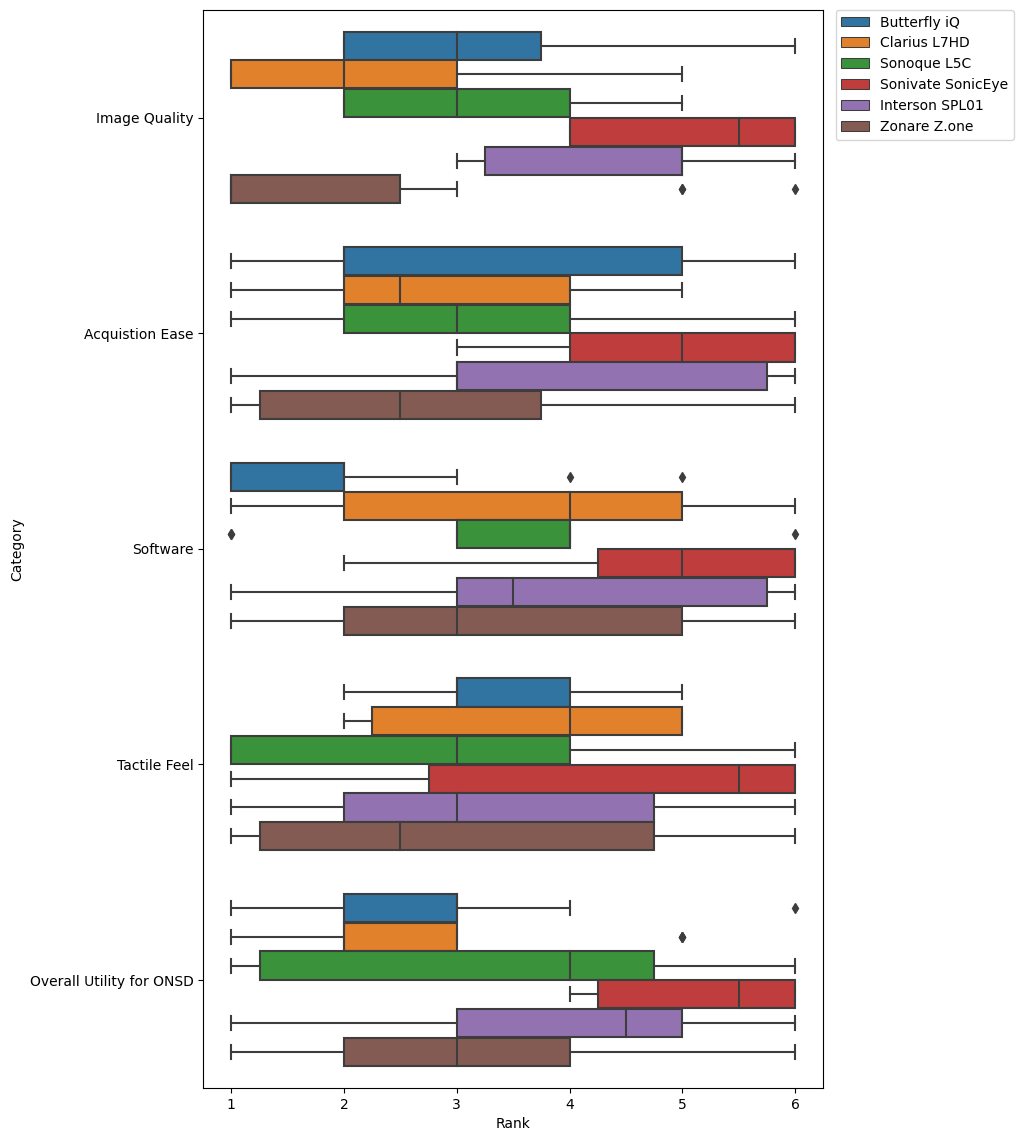

In [22]:
from usqc.manuscript import PROBE_PRETTY, PROBE_ORDERED
import matplotlib.pyplot as plt
import seaborn as sb

prop_pretty = { 'image_quality' : 'Image Quality', 'acquisition_ease' : 'Acquistion Ease', 'software' : 'Software', 'tactile' : 'Tactile Feel', 'overall_onsd' : 'Overall Utility for ONSD' }
probe_pretty = { 'mindray' : 'Zonare Z.one', 'butterfly' : 'Butterfly iQ', 'clarius' : 'Clarius L7HD', 'sonivate' : 'Sonivate SonicEye', 'interson' : 'Interson SPL01', 'sonoque' : 'Sonoque L5C' }

print(probe_pretty)

df2.replace(prop_pretty, inplace=True)
df2.replace(probe_pretty, inplace=True)
df2.rename({'probe' : 'Probe', 'value' : 'Rank', 'category' : 'Category'}, axis=1, inplace=True)
df2.Probe = pd.Categorical(df2.Probe, categories=PROBE_ORDERED + ['Zonare Z.one'], ordered=True)
fig, ax = plt.subplots(1,1,figsize=(8,14))
sb.boxplot(df2, x='Rank', y='Category', hue='Probe', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('../data/phantom_study-202201/analysis/fig-physician-preference.pdf', bbox_inches='tight')

In [4]:
def anova_by_property_type(property_type):
    x = [property_type + '-' + x for x in ['butterfly', 'clarius', 'mindray', 'interson', 'sonoque', 'sonivate']]
    tmp_df = survey_df[x].dropna()
    return scipy.stats.f_oneway(*[tmp_df[x] for x in tmp_df.columns])

for p in property_types:
    print(p + ':', anova_by_property_type(p))

image_quality: F_onewayResult(statistic=10.14308300395257, pvalue=1.6505998697843716e-07)
acquisition_ease: F_onewayResult(statistic=3.068416735028712, pvalue=0.014442023741309712)
software: F_onewayResult(statistic=5.514864317537466, pvalue=0.00021232590753149995)
tactile: F_onewayResult(statistic=1.596246648793566, pvalue=0.1710006655354242)
overall_onsd: F_onewayResult(statistic=5.426815642458101, pvalue=0.00027208656125900157)
